# 3.2. Решение линейного стока (с использованием Ei)

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Версия 0.2 от 07.10.2025


---

Содержание

1. [Уравнение фильтрации в радиальной форме ](#321)
2. [Решение линейного стока](#322)
3. [Построение графика решения от расстояния для произвольного момента времени в безразмерных координатах](#323)
4. [Построение графика решения - изменения забойного давления от времени в безразмерных координатах](#324)
5. [Построение графиков решения в размерных координатах](#325)
6. [Построение графиков для разных моментов времени](#326)
7. [Задания для самостоятельной работы](#327)

In [1]:
# импортируем библиотеки для расчетов

# numpy используем для работы с массивами и подготовки данных для построения графиков. 
# Также в некоторых функциях используем возможности векторных расчетов numpy
import numpy as np

# matplotlib используем для построения графиков
import matplotlib.pyplot as plt

# scipy.special используем как альтернативный вариант расчета специальных функций
import scipy.special as sc

# 1. Уравнение фильтрации в радиальной форме <a class="anchor" id="321"></a>

Уравнение фильтрации для радиального потока в линеаризованном виде можно записать в виде

$$ 
\frac{\partial p}{\partial t} = 0.00036 \dfrac{k}{\phi \mu c_t} \dfrac{1}{r} \left[ \dfrac{\partial}{\partial r} \left( r \dfrac{ \partial p} {\partial r} \right) \right]  
\tag{1}
$$

Напомним, здесь
* $p$ - давление, атм
* $t$ - время, час
* $k$ - проницаемость в направлении движения потока, мД
* $\mu$ - динамическая вязкость, сП
* $\phi$ - пористость, д.е.
* $c_t$ - сжимаемость, 1/атм
* $r$ - расстояние от центра, м

Часто для анализа уравнений неустановившейся фильтрации используются безразмерные переменные. Мы будем использовать переменные в виде:

$$ r_D = \frac{r}{r_w} \tag{2} $$
$$ t_D = \frac{0.00036 kt}{\phi \mu c_t r_w^2}  \tag{3}$$
$$ p_D = \frac{kh}{ 18.42 q_s B \mu} \left( p_i - p \right)  \tag{4} $$

Здесь использование единицы измерения СИ.
* $r_w$ - радиус скважины, м
* $r$ - расстояние от центра скважины до точки в пласте, м
* $q_s$ - дебит скважины на поверхности, приведенный к нормальным условиям м3/сут
* $\phi$ - пористость, доли единиц
* $\mu$ - вязкость нефти в пласте, сП
* $B$ - объемный коэффициент нефти, м3/м3
* $p_i$ - начальное давление в пласте, атм
* $p$ - давление на расстоянии $r$, атм
* $c_t$ - общая сжимаемость системы в пласте, 1/атм

Использование безразмерных переменных позволяет упростить уравнение фильтрации (2.2.9), которое примет вид

$$ 
\frac{\partial p_D}{ \partial t_D} = \dfrac{1}{r_D} \left[ \dfrac{\partial}{\partial r_D} \left( r_D \dfrac{ \partial p_D} {\partial r_D} \right) \right] 
\tag{5}
$$

Решение этого уравнения - функция безразмерного давления от безразмерных времени и расстояния $p_D(r_D, t_D) $


# 2. Решение линейного стока  <a class="anchor" id="322"></a>
Для решения уравнения фильтрации - линейного дифференциального уравнения в частных производных второго порядка необходимо задать начальные и граничные условия.
Самое простое решение можно получить для случая вертикальной скважины бесконечно малого радиуса запускающейся с постоянным дебитом. Условия соответствующие этому случаю можно выразить следующим образом

* начальное условие. До запуска скважины в момент времени  $t_D = 0$ давление в пласте равно начальному во всех точках $p=p_i$
$$ t_D < 0, p_D = 0 \tag{6}$$

* условие постоянства дебита на скважине - граничное условие на скважине
$$ \lim_{r_D \to 0} {r_D \frac{\partial p_D}{\partial r_D}} = -1  \tag{7}$$

* условие на бесконечном расстоянии возмущения от скважине нет
$$ r_D = \infty, p_D = 0  \tag{8}$$

В этом случае решение может быть выражено через функцию интегральной экспоненты
$$ p_D(r_D,t_D) = - \frac{1}{2} Ei \left(- \dfrac{ r_D^2}{4t_d} \right)  \tag{9}$$

где -Ei(-x) - интегральная показательная функция.

Решение в размерных переменных можно записать как
$$
p\left(r,t\right)=p_i-\frac{18.42q_sB\mu}{kh}\left(-\frac{1}{2} Ei \left(-\frac{\varphi\mu c_tr^2}{0.00144kt}\right)\right) 
\tag{10}
$$



In [2]:
# Решение линейного стока уравнения фильтрации
def pd_ei(td, rd):
    """
    Решение линейного стока уравнения фильтрации
    rd - безразмерное расстояние
    td - безразмерное время
    """
    return -1/2*sc.expi(-rd**2 / 4 / td)

# 3. Построение графика решения от расстояния для произвольного момента времени в безразмерных координатах <a class="anchor" id="323"></a>

Пример показывает как построить распределение давления для заданного момента времени. Помните что тут безразмерное давление и время. Для построения графика используется логарифмическое распределение значений расстояния, так как около нуля требуется больше точек для отображения из за значительного изменения функции.

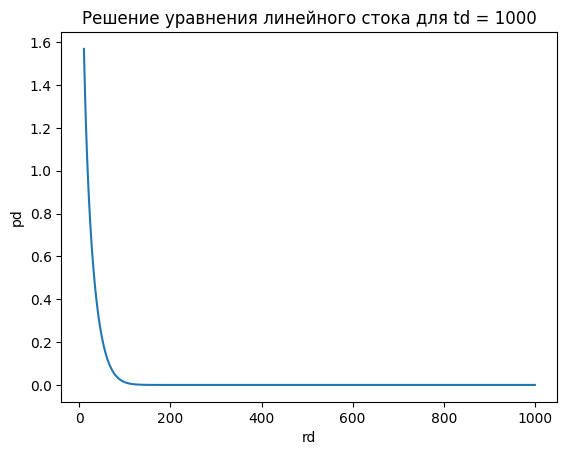

In [3]:
td = 1000
rd_arr = np.logspace(1, 3, 100)
# при построении используем векторный расчет
plt.plot(rd_arr, pd_ei(td, rd_arr) )
plt.title("Решение уравнения линейного стока для td = {}".format(td))
plt.xlabel("rd")
plt.ylabel("pd")
plt.show()

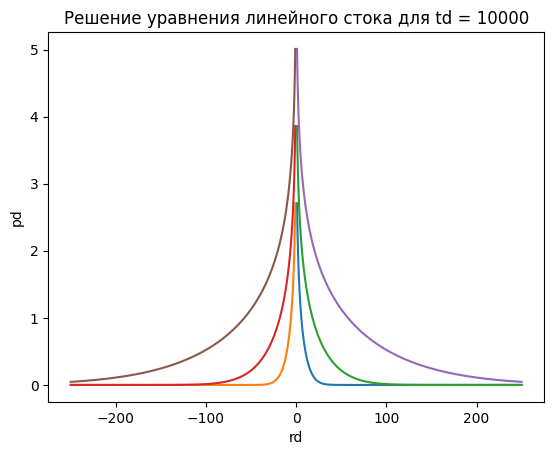

In [19]:
for td in [100, 1000, 10000]:
    rd_arr = np.logspace(0, np.log10(250), 100)
    # при построении используем векторный расчет
    plt.plot(rd_arr, pd_ei(td, rd_arr) )
    plt.plot(-rd_arr, pd_ei(td, rd_arr) )
    plt.title("Решение уравнения линейного стока для td = {}".format(td))
    plt.xlabel("rd")
    plt.ylabel("pd")
plt.show()

# 4. Построение графика решения - изменения забойного давления от времени в безразмерных координатах <a class="anchor" id="324"></a>


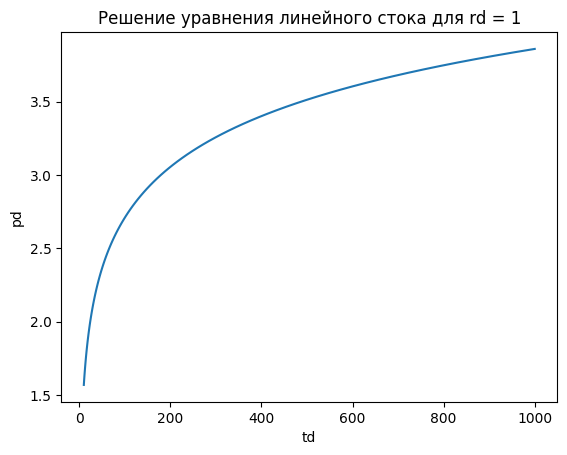

In [20]:
td_arr = np.logspace(1, 3, 100)
rd = 1 # соответствует забойному давлению
# при построении используем векторный расчет
plt.plot(td_arr, pd_ei(td_arr, rd) )
plt.title("Решение уравнения линейного стока для rd = {}".format(rd))
plt.xlabel("td")
plt.ylabel("pd")
plt.show()

# 5. Построение графиков решения в размерных координатах <a class="anchor" id="325"></a>


In [5]:
# определим функции для перевода размерных переменных в безразмерные и обратно
# пригодится потом для построения графиков и ведения расчетов

# при наименовании функций придерживаемся следующих соглашений
# сначала идет название того, что считаем
# в конце указывается размерность результата, если это уместно

def r_from_rd_m(rd, rw_m=0.1):
    """
    перевод безразмерного расстояния в размерное
    rd -  безразмерное расстояние
    rw_m -  радиус скважины, м
    """
    return rd*rw_m

def rd_from_r(r_m, rw_m=0.1):
    """
    перевод размерного расстояния в безразмерное
    r_m - размерное расстояние, м
    rw_m - радиус скважины, м
    """
    return r_m/rw_m

def t_from_td_hr(td, k_mD=10, phi=0.2, mu_cP=1, ct_1atm=1e-5, rw_m=0.1):
    """
    перевод безразмерного времени в размерное, результат в часах
    td - безразмерное время
    k_mD - проницаемость пласта, мД
    phi - пористость, доли единиц
    mu_cP - динамическая вязкость флюида, сП
    ct_1atm - общая сжимаемость, 1/атм
    rw_m - радиус скважины, м
    """
    return td * phi * mu_cP * ct_1atm * rw_m * rw_m / k_mD / 0.00036

def td_from_t(t_hr, k_mD=10, phi=0.2, mu_cP=1, ct_1atm=1e-5, rw_m=0.1):
    """
    перевод размерного времени в безразмерное
    t_hr - размерное время, час
    k_mD - проницаемость пласта, мД
    phi - пористость, доли единиц
    mu_cP - динамическая вязкость флюида, сП
    ct_1atm - общая сжимаемость, 1/атм
    rw_m - радиус скважины, м
    """
    return  0.00036 * t_hr * k_mD / (phi * mu_cP * ct_1atm * rw_m * rw_m) 

def p_from_pd_atma(pd, k_mD=10, h_m=10, q_sm3day=20, b_m3m3=1.2, mu_cP=1, pi_atma=250):
    """
    перевод безразмерного давления в размерное, результат в абсолютных атмосферах
    pd - безразмерное давление
    k_mD - проницаемость пласта, мД
    h_m - мощность пласта, м
    q_sm3day - дебит на поверхности, м3/сут в с.у.
    fvf_m3m3 - объемный коэффициент нефти, м3/м3
    mu_cP - динамическая вязкость флюида, сП
    pi_atma - начальное давление, абсолютные атм.
    """
    return pi_atma - pd * 18.41 * q_sm3day * b_m3m3 * mu_cP / k_mD / h_m 

def pd_from_p(p_atma, k_mD=10, h_m=10, q_sm3day=20, b_m3m3=1.2, mu_cP=1, pi_atma=250):
    """
    перевод размерного давления в безразмерное
    p_atma - давление
    k_mD - проницаемость пласта, мД
    h_m - мощность пласта, м
    q_sm3day - дебит на поверхности, м3/сут в с.у.
    fvf_m3m3 - объемный коэффициент нефти, м3/м3
    mu_cP - динамическая вязкость флюида, сП
    pi_atma - начальное давление, абсолютные атм.
    """
    return (pi_atma - p_atma) / (18.41 * q_sm3day * b_m3m3 * mu_cP) * k_mD * h_m 

Хорошо видна воронка депрессии. Если изменить значение времени и перестроить график можно убедиться, что решение будет меняться и воронка депресси будет менять свой размер. Убедиться в этом можно построить сразу много графиков

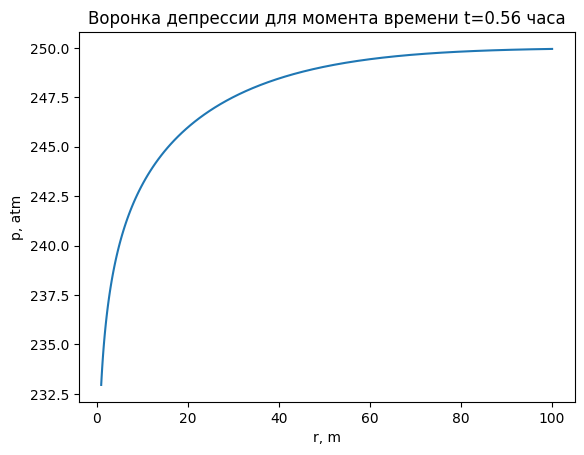

In [6]:
# построим решение для размерных величин
# при переводе величин в размерные полагаемся на значения параметров по умолчанию заданные 
# при определении переводных функций
td = 100000
rd_arr = np.logspace(1, 3, 100)
# для наглядности проведем преобразования в отдельные переменные. можно было сделать и на месте
# все преобразования и расчеты делаются векторно за счет использования numpy
r_arr = r_from_rd_m(rd_arr)
# проводим расчет
p_arr = p_from_pd_atma(pd_ei(td,rd_arr))  # параметры пласту тут берутся по умолчанию
# строим графики
plt.plot(r_arr, p_arr )
plt.title("Воронка депрессии для момента времени t={:.2f} часа".format(t_from_td_hr(td)))
plt.xlabel("r, m")
plt.ylabel("p, atm")
plt.show()

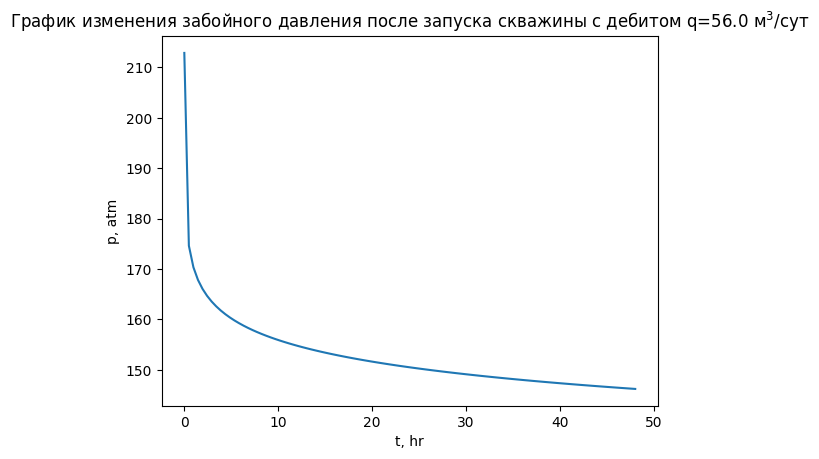

In [7]:
# построим решение для размерных величин
# при переводе величин в размерные полагаемся на значения параметров по умолчанию заданные 
# при определении переводных функций

# зададим диапазон изменения времени
t_arr = np.linspace(0.001, 48, 100)
# переведем в безразмерные координаты
td_arr = td_from_t(t_arr)
rd = 1  # соотвествует забойному давлению
q = 56

# для наглядности проведем преобразования в отдельные переменные. можно было сделать и на месте
# все преобразования и расчеты делаются векторно за счет использования numpy
r = r_from_rd_m(rd)
# проводим расчет
p_arr = p_from_pd_atma(pd_ei(td_arr,rd), 
                       q_sm3day=q
                      )
# строим графики
plt.plot(t_arr, p_arr )
plt.title("График изменения забойного давления после запуска скважины с дебитом q={:.1f} м$^3$/сут".format(q))
plt.xlabel("t, hr")
plt.ylabel("p, atm")
plt.show()

# 6.Построение графиков для разных моментов времени <a class="anchor" id="326"></a>

Мы можем зациклить расчет распределений давления, и сформировать много кривых на графике matplotlib и потом отобразить их. Получится прикольная картинка.

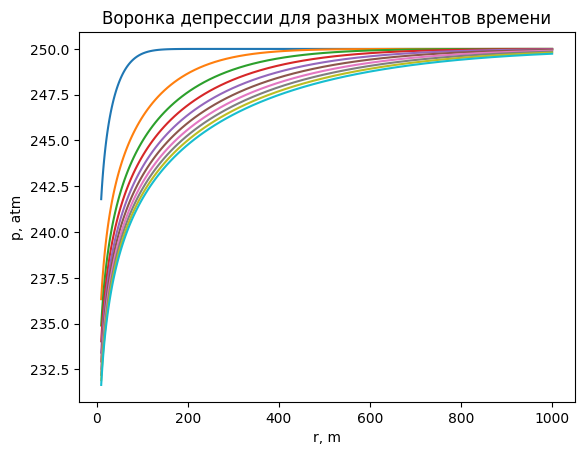

In [8]:
# Пример построения сразу нескольких решений на одном графике
# Зададим массив (итератор) определяющий количество графиков которые мы хотим построить
n=np.linspace(1,100,10)
# зададим диапазон изменения расстояний и количество точек для которых строятся кривые
r_arr_m = np.logspace(1, 3, 100)

# цикл расчета. Полезно понимать тут, что функция Ei будет вызываться число раз равное
# произведению количества графиков на количество точек. 
# для сложных функций это время может оказаться достаточно заметным
for i in n:
    t_hr = 1*i
      # здесь используем расчет заполнения массива с использованием итератора python - 
      # не самый быстрый вариант для этой функции, но работает
    plt.plot(r_arr_m, [p_from_pd_atma(pd_ei(td_from_t(t_hr), rdi)) for rdi in rd_from_r(r_arr_m)])
plt.title("Воронка депрессии для разных моментов времени")
plt.xlabel("r, m")
plt.ylabel("p, atm")
plt.show()

# 7. Задания для самостоятельной работы <a class="anchor" id="327"></a>

Для совершенствования навыков работы с python выполните следующие задания:

1. Постройте графики зависимости забойного давления от времени в полулогарифмических координатах
2. Сравниет графики распределения давления вокруг скважины с использованием стационарного решения и решения линейного стока